# IFS hplp experiment data

> [!NOTE]
> The online laboratory has only been tested in recent Firefox and Chrome browsers. Some features may not (yet) be supported in Safari browsers.

> [!CAUTION]
> Any changes you make to this notebook will be lost once the page is closed or refreshed. Please download any files you would like to keep.

This notebook is a comprehensive guide to accessing GRIB files for the [hplp experiment](https://apps.ecmwf.int/ifs-experiments/rd/hplp/). It includes details about the available parameters, levels, and steps, along with instructions for using the `load_grib_files` function to access these files from the [ECMWF S3 bucket](https://object-store.os-api.cci1.ecmwf.int/esiwacebucket/hplp/). The GRIB files are not downloaded locally; instead, they are accessed remotely using `gribscan`, `fsspec`, and `zarr` via their corresponding `.ref` metadata files (also hosted in the S3 bucket), which were produced up-front using `gribscan`.

---

## Experiment Details and Available Data Fields

The dataset contains uncompressed IEEE-754 Standard (1985) 64-bit floating-point single-time atmospheric and wave model (long window 4Dvar) outputs from the IFS.
The simulation was conducted on a reduced Gaussian octahedral grid (Tco399), corresponding to a horizontal resolution of approximately 28 km, and with 137 vertical model levels. The 10-day weather forecast is provided in 12-hour intervals, beginning from 2020-07-21 at 00:00:00 UTC.

The GRIB files are organized into different types of data fields based on the levels at which they are stored.

### Pressure Level Parameters

The following parameters are available as pressure level fields:
```python
["z", "t", "q", "w", "vo", "d", "u", "v", "r"]
```

These parameters are stored at the following pressure levels (in hPa):
```python
[1, 2, 3, 5, 7, 10, 20, 30, 50, 70, 100, 150, 200, 250, 300, 400, 500, 700, 850, 925, 1000]
```

The corresponding IDs and more information are given in the table below:

|   paramId | gridName   | gridType   | typeOfLevel   | shortName   | packingType      |
|----------:|:-----------|:-----------|:--------------|:------------|:-----------------|
|       129 | not_found  | sh         | isobaricInhPa | z           | spectral_complex |
|       130 | not_found  | sh         | isobaricInhPa | t           | spectral_complex |
|       133 | O400       | reduced_gg | isobaricInhPa | q           | spectral_complex |
|       135 | not_found  | sh         | isobaricInhPa | w           | spectral_complex |
|       138 | not_found  | sh         | isobaricInhPa | vo          | spectral_complex |
|       155 | not_found  | sh         | isobaricInhPa | d           | spectral_complex |
|       131 | not_found  | sh         | isobaricInhPa | u           | spectral_complex |
|       132 | not_found  | sh         | isobaricInhPa | v           | spectral_complex |
|       157 | not_found  | sh         | isobaricInhPa | r           | spectral_complex |

### Model Level Parameters

The following parameters are available as model level fields:
```python
["crwc", "cswc", "z", "t", "q", "w", "vo", "lnsp", "d", "u", "v", "o3", "clwc", "ciwc", "cc"]
```
These parameters are stored at the following levels:
```python
[list(range(1, 138))] # Levels 1 to 137
```
For more information about the model levels please see [here](https://confluence.ecmwf.int/display/UDOC/Model+level+definitions) and [here](https://confluence.ecmwf.int/display/UDOC/L137+model+level+definitions).

The corresponding IDs and more information are given in the table below:

|   paramId | gridName   | gridType   | typeOfLevel   | shortName   | packingType   |
|----------:|:-----------|:-----------|:--------------|:------------|:--------------|
|        75 | O400       | reduced_gg | hybrid        | crwc        | grid_ieee     |
|        76 | O400       | reduced_gg | hybrid        | cswc        | grid_ieee     |
|       129 | not_found  | sh         | hybrid        | z           | grid_ieee     |
|       130 | not_found  | sh         | hybrid        | t           | grid_ieee     |
|       133 | O400       | reduced_gg | hybrid        | q           | grid_ieee     |
|       135 | not_found  | sh         | hybrid        | w           | grid_ieee     |
|       138 | not_found  | sh         | hybrid        | vo          | grid_ieee     |
|       152 | not_found  | sh         | hybrid        | lnsp        | grid_ieee     |
|       155 | not_found  | sh         | hybrid        | d           | spectral_ieee |
|       131 | not_found  | sh         | hybrid        | u           | spectral_ieee |
|       132 | not_found  | sh         | sh            | v           | spectral_ieee |
|       203 | O400       | reduced_gg | sh            | o3          | spectral_ieee |
|       246 | O400       | reduced_gg | sh            | clwc        | spectral_ieee |
|       247 | O400       | reduced_gg | sh            | ciwc        | spectral_ieee |
|       248 | O400       | reduced_gg | sh            | cc          | spectral_ieee |

### Surface Level Parameters

The following parameters are available as surface level fields:
```python
['cin', 'sro', 'ssro', 'vis', 'i10fg', 'ci', 'asn', 'rsn', 'sst', 'istl1', 'istl2', 'istl3', 'istl4', 'swvl1', 'swvl2', 'swvl3', 'swvl4', 'es', 'smlt', 'dsrp', '10fg', 'lspf', 'uvb', 'par', 'cape', 'tclw', 'tciw', 'tcrw', 'tcsw', 'z', 'ocu', 'ocv', 'tcw', 'tcwv', 'stl1', 'sd', 'lsp', 'cp', 'sf', 'bld', 'sshf', 'slhf', 'chnk', 'msl', 'blh', 'tcc', '10u', '10v', '2t', '2d', 'ssrd', 'stl2', 'lsm', 'strd', 'ssr', 'str', 'tsr', 'ttr', 'ewss', 'nsss', 'e', 'stl3', 'lcc', 'mcc', 'hcc', 'sund', 'lgws', 'mgws', 'gwd', 'src', 'mx2t', 'mn2t', 'ro', 'tco3', 'tsrc', 'ttrc', 'ssrc', 'strc',  'tisr', 'vimd', 'fzra', 'ilspf', 'crr', 'lsrr', 'csfr', 'lssfr', 'tp', 'iews', 'inss', 'ishf', 'ie', 'skt', 'stl4', 'tsn', 'fal', 'fsr', 'flsr', 'pev', 'ptype', 'kx', 'totalx']
```

The corresponding IDs and more information are given in the table below:

|   paramId | gridName   | gridType   | typeOfLevel         | shortName   | packingType   |
|----------:|:-----------|:-----------|:--------------------|:------------|:--------------|
|    228001 | O400       | reduced_gg | surface             | cin         | grid_ieee     |
|         8 | O400       | reduced_gg | surface             | sro         | grid_ieee     |
|         9 | O400       | reduced_gg | surface             | ssro        | grid_ieee     |
|      3020 | O400       | reduced_gg | surface             | vis         | grid_ieee     |
|    228029 | O400       | reduced_gg | surface             | i10fg       | grid_ieee     |
|        31 | O400       | reduced_gg | surface             | ci          | grid_ieee     |
|        32 | O400       | reduced_gg | surface             | asn         | grid_ieee     |
|        33 | O400       | reduced_gg | surface             | rsn         | grid_ieee     |
|        34 | O400       | reduced_gg | surface             | sst         | grid_ieee     |
|        35 | O400       | reduced_gg | surface             | istl1       | grid_ieee     |
|        36 | O400       | reduced_gg | surface             | istl2       | grid_ieee     |
|        37 | O400       | reduced_gg | surface             | istl3       | grid_ieee     |
|        38 | O400       | reduced_gg | surface             | istl4       | grid_ieee     |
|        39 | O400       | reduced_gg | surface             | swvl1       | grid_ieee     |
|        40 | O400       | reduced_gg | surface             | swvl2       | grid_ieee     |
|        41 | O400       | reduced_gg | surface             | swvl3       | grid_ieee     |
|        42 | O400       | reduced_gg | surface             | swvl4       | grid_ieee     |
|        44 | O400       | reduced_gg | surface             | es          | grid_ieee     |
|        45 | O400       | reduced_gg | surface             | smlt        | grid_ieee     |
|        47 | O400       | reduced_gg | surface             | dsrp        | grid_ieee     |
|        49 | O400       | reduced_gg | surface             | 10fg        | grid_ieee     |
|        50 | O400       | reduced_gg | surface             | lspf        | grid_ieee     |
|        57 | O400       | reduced_gg | surface             | uvb         | grid_ieee     |
|        58 | O400       | reduced_gg | surface             | par         | grid_ieee     |
|        59 | O400       | reduced_gg | surface             | cape        | grid_ieee     |
|        78 | O400       | reduced_gg | surface             | tclw        | grid_ieee     |
|        79 | O400       | reduced_gg | surface             | tciw        | grid_ieee     |
|    228089 | O400       | reduced_gg | surface             | tcrw        | grid_ieee     |
|    228090 | O400       | reduced_gg | surface             | tcsw        | grid_ieee     |
|       129 | O400       | reduced_gg | surface             | z           | grid_ieee     |
|    151131 | O400       | reduced_gg | surface             | ocu         | grid_ieee     |
|    151132 | O400       | reduced_gg | surface             | ocv         | grid_ieee     |
|       136 | O400       | reduced_gg | surface             | tcw         | grid_ieee     |
|       137 | O400       | reduced_gg | surface             | tcwv        | grid_ieee     |
|       139 | O400       | reduced_gg | surface             | stl1        | grid_ieee     |
|       141 | O400       | reduced_gg | surface             | sd          | grid_ieee     |
|       142 | O400       | reduced_gg | surface             | lsp         | grid_ieee     |
|       143 | O400       | reduced_gg | surface             | cp          | grid_ieee     |
|       144 | O400       | reduced_gg | surface             | sf          | grid_ieee     |
|       145 | O400       | reduced_gg | surface             | bld         | grid_ieee     |
|       146 | O400       | reduced_gg | surface             | sshf        | grid_ieee     |
|       147 | O400       | reduced_gg | surface             | slhf        | grid_ieee     |
|       148 | O400       | reduced_gg | surface             | chnk        | grid_ieee     |
|       151 | O400       | reduced_gg | surface             | msl         | grid_ieee     |
|       159 | O400       | reduced_gg | surface             | blh         | grid_ieee     |
|       164 | O400       | reduced_gg | surface             | tcc         | grid_ieee     |
|       165 | O400       | reduced_gg | surface             | 10u         | grid_ieee     |
|       166 | O400       | reduced_gg | surface             | 10v         | grid_ieee     |
|       167 | O400       | reduced_gg | surface             | 2t          | grid_ieee     |
|       168 | O400       | reduced_gg | surface             | 2d          | grid_ieee     |
|       169 | O400       | reduced_gg | surface             | ssrd        | grid_ieee     |
|       170 | O400       | reduced_gg | surface             | stl2        | grid_ieee     |
|       172 | O400       | reduced_gg | surface             | lsm         | grid_ieee     |
|       175 | O400       | reduced_gg | surface             | strd        | grid_ieee     |
|       176 | O400       | reduced_gg | surface             | ssr         | grid_ieee     |
|       177 | O400       | reduced_gg | surface             | str         | grid_ieee     |
|       178 | O400       | reduced_gg | surface             | tsr         | grid_ieee     |
|       179 | O400       | reduced_gg | surface             | ttr         | grid_ieee     |
|       180 | O400       | reduced_gg | surface             | ewss        | grid_ieee     |
|       181 | O400       | reduced_gg | surface             | nsss        | grid_ieee     |
|       182 | O400       | reduced_gg | surface             | e           | grid_ieee     |
|       183 | O400       | reduced_gg | surface             | stl3        | grid_ieee     |
|       186 | O400       | reduced_gg | surface             | lcc         | grid_ieee     |
|       187 | O400       | reduced_gg | surface             | mcc         | grid_ieee     |
|       188 | O400       | reduced_gg | surface             | hcc         | grid_ieee     |
|       189 | O400       | reduced_gg | surface             | sund        | grid_ieee     |
|       195 | O400       | reduced_gg | surface             | lgws        | grid_ieee     |
|       196 | O400       | reduced_gg | surface             | mgws        | grid_ieee     |
|       197 | O400       | reduced_gg | surface             | gwd         | grid_ieee     |
|       198 | O400       | reduced_gg | surface             | src         | grid_ieee     |
|       201 | O400       | reduced_gg | surface             | mx2t        | grid_ieee     |
|       202 | O400       | reduced_gg | surface             | mn2t        | grid_ieee     |
|       205 | O400       | reduced_gg | surface             | ro          | grid_ieee     |
|       206 | O400       | reduced_gg | surface             | tco3        | grid_ieee     |
|       208 | O400       | reduced_gg | surface             | tsrc        | grid_ieee     |
|       209 | O400       | reduced_gg | surface             | ttrc        | grid_ieee     |
|       210 | O400       | reduced_gg | surface             | ssrc        | grid_ieee     |
|       211 | O400       | reduced_gg | surface             | strc        | grid_ieee     |
|       212 | O400       | reduced_gg | surface             | tisr        | grid_ieee     |
|       213 | O400       | reduced_gg | surface             | vimd        | grid_ieee     |
|    228216 | O400       | reduced_gg | surface             | fzra        | grid_ieee     |
|    228217 | O400       | reduced_gg | surface             | ilspf       | grid_ieee     |
|    228218 | O400       | reduced_gg | surface             | crr         | grid_ieee     |
|    228219 | O400       | reduced_gg | surface             | lsrr        | grid_ieee     |
|    228220 | O400       | reduced_gg | depthBelowLandLayer | csfr        | grid_ieee     |
|    228221 | O400       | reduced_gg | depthBelowLandLayer | lssfr       | grid_ieee     |
|       228 | O400       | reduced_gg | depthBelowLandLayer | tp          | grid_ieee     |
|       229 | O400       | reduced_gg | depthBelowLandLayer | iews        | grid_ieee     |
|       230 | O400       | reduced_gg | depthBelowLandLayer | inss        | grid_ieee     |
|       231 | O400       | reduced_gg | depthBelowLandLayer | ishf        | grid_ieee     |
|       232 | O400       | reduced_gg | depthBelowLandLayer | ie          | grid_ieee     |
|       235 | O400       | reduced_gg | depthBelowLandLayer | skt         | grid_ieee     |
|       236 | O400       | reduced_gg | depthBelowLandLayer | stl4        | grid_ieee     |
|       238 | O400       | reduced_gg | depthBelowLandLayer | tsn         | grid_ieee     |
|       243 | O400       | reduced_gg | depthBelowLandLayer | fal         | grid_ieee     |
|       244 | O400       | reduced_gg | depthBelowLandLayer | fsr         | grid_ieee     |
|       245 | O400       | reduced_gg | depthBelowLandLayer | flsr        | grid_ieee     |
|    228251 | O400       | reduced_gg | depthBelowLandLayer | pev         | grid_ieee     |
|    260015 | O400       | reduced_gg | depthBelowLandLayer | ptype       | grid_ieee     |
|    260121 | O400       | reduced_gg | depthBelowLandLayer | kx          | grid_ieee     |
|    260123 | O400       | reduced_gg | depthBelowLandLayer | totalx      | grid_ieee     |

### Wave Model Parameters

The following parameters are available for the wave model data:
```python
['wstar', 'rhoao', 'phioc', 'tauoc', 'ust', 'vst', 'hmax', 'wmb', 'mp1', 'mp2', 'wdw', 'swh', 'mwd', 'pp1d', 'mwp', 'cdww', 'wind','dwi']
```

The corresponding IDs and more information are given in the table below:

|   paramId | gridName   | gridType   | typeOfLevel       | shortName   | packingType   |
|----------:|:-----------|:-----------|:------------------|:------------|:--------------|
|    140208 | not_found  | reduced_ll | meanSea           | wstar       | grid_simple   |
|    140209 | not_found  | reduced_ll | meanSea           | rhoao       | grid_simple   |
|    140212 | not_found  | reduced_ll | meanSea           | phioc       | grid_simple   |
|    140214 | not_found  | reduced_ll | meanSea           | tauoc       | grid_simple   |
|    140215 | not_found  | reduced_ll | meanSea           | ust         | grid_simple   |
|    140216 | not_found  | reduced_ll | meanSea           | vst         | grid_simple   |
|    140218 | not_found  | reduced_ll | meanSea           | hmax        | grid_simple   |
|    140219 | not_found  | reduced_ll | meanSea           | wmb         | grid_simple   |
|    140220 | not_found  | reduced_ll | meanSea           | mp1         | grid_simple   |
|    140221 | not_found  | reduced_ll | meanSea           | mp2         | grid_simple   |
|    140222 | not_found  | reduced_ll | meanSea           | wdw         | grid_simple   |
|    140229 | not_found  | reduced_ll | meanSea           | swh         | grid_simple   |
|    140230 | not_found  | reduced_ll | meanSea           | mwd         | grid_simple   |
|    140231 | not_found  | reduced_ll | meanSea           | pp1d        | grid_simple   |
|    140232 | not_found  | reduced_ll | meanSea           | mwp         | grid_simple   |
|    140233 | not_found  | reduced_ll | heightAboveGround | cdww        | grid_simple   |
|    140245 | not_found  | reduced_ll | heightAboveGround | wind        | grid_simple   |
|    140249 | not_found  | reduced_ll | heightAboveGround | dwi         | grid_simple   |

## Available Steps 

The following timesteps are available: 

```python 
[0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180, 192, 204, 216, 228, 240]
 ```
Timestep 0 is 2020-07-21T 00:00:00 UTC, increasing in 12-hour steps to 240  which is 2020-07-31T 00:00:00 UTC.

## Using the `load_grib_files` Function

To load the GRIB files, you can use the following function:

```python
load_grib_files(leveltype=None, gridtype=None, step=None, remap=False)
```

### Parameters

- **`leveltype`**: Defines the type of data to load. Choose one of the following:
  - `"pl"`: Pressure level fields.
  - `"ml"`: Model level fields.
  - `"sfc"`: Surface level fields.
  - `"wave"`: Wave model fields.
- **`gridtype`**: Specifies the grid type for the data. Options include:
  - `"reduced_gg"`: Reduced Gaussian grid (available for `pl`, `ml`, and `sfc`).
  - `"sh"`: Spherical harmonic coefficients (available for `pl` and `ml`).
  - `"reduced_ll"`: Reduced lat-long grid (available for `wave`).
- **`step`**: The `ml` data on the `reduced_gg` grid is split into two files. Specify the timestep (`step`) to load the corresponding file. Valid steps are:
  - `0-120`: First file (2020-07-21T00:00:00 to 2020-07-26T00:00:00).
  - `132-240`: Second file (2020-07-26T12:00:00 to 2020-07-31T00:00:00).
- **`remap`**: When using gridtype=`sh`, data cannot be directly plotted. To load remapped data on an O400 grid, set `remap=True`.

In [2]:
# URL of S3 bucket
BASE_URL = "https://object-store.os-api.cci1.ecmwf.int/esiwacebucket"

First, the package `zarr` (modern dataset format that is specifically designed for chunked access), its dependencies, and `gribscan` need to be imported for the remote access.

In [3]:
import aiohttp
import fsspec
import gribscan
import zarr

The `load_grib_files` function simplifies remote access to GRIB datasets stored on the S3 bucket. It validates input parameters, constructs the correct URL for the requested data, and loads it efficiently as an xarray dataset using the corresponding `.ref` file.


In [4]:
import json

import requests
import xarray as xr

def load_grib_files(leveltype=None, gridtype=None, step=None, remap=False):
    if leveltype not in {"pl", "ml", "sfc", "wave"}:
        raise ValueError(f"Invalid leveltype: {leveltype}")

    if leveltype in {"ml", "pl"} and not gridtype:
        raise ValueError(f"Gridtype is required for leveltype '{leveltype}'. Available: reduced_gg, sh")

    if remap and gridtype != "sh":
        raise ValueError(f"Only 'sh' fields can be remapped.")

    if leveltype == "wave" and gridtype != "reduced_ll":
        print("Warning: Wave model data is stored on a reduced_ll grid.")

    if leveltype == "sfc" and gridtype != "reduced_gg":
        print("Warning: Surface level data is stored on a reduced_gg grid.")

    if step and not (leveltype == "ml" and gridtype == "reduced_gg"):
        print("Warning: Specifying 'step' is unnecessary for this configuration and will be ignored.")

    if leveltype in {"sfc", "wave"}:
        url = f"{BASE_URL}/hplp/hplp_{leveltype}.grib"
    elif leveltype == "ml" and gridtype == "reduced_gg":
        if step is None:
            raise ValueError(
                "The ml reduced_gg data is split into two parts:\n"
                "  - Steps: 0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120 (2020-07-21T00:00:00 to 2020-07-26T00:00:00)\n"
                "  - Steps: 132, 144, 156, 168, 180, 192, 204, 216, 228, 240 (2020-07-26T12:00:00 to 2020-07-31T00:00:00)\n"
                "Specify a step smaller than 120 for accessing the first part, \n"
                "and a step greater or equal to 132 for accessing the second part."
            )          
        if step <= 120:
            url = f"{BASE_URL}/hplp/hplp_{leveltype}_{gridtype}_levels_0_120.grib"
        else:
            url = f"{BASE_URL}/hplp/hplp_{leveltype}_{gridtype}_levels_132_240.grib"
    else:
        url = f"{BASE_URL}/hplp/hplp_{leveltype}_{gridtype}" + ("_O400.grib" if remap else ".grib")
    ref = requests.get(f"{url}.ref").json()

    print(f"Loading dataset {url}")

    return xr.open_dataset(
        "reference://",
        engine="zarr",
        backend_kwargs={"storage_options": {"fo": ref}},
        consolidated=False,
    )

## Example Usage

To load GRIB file for pressure level parameters, you can use the following example. This will load the pressure level data stored on a `reduced_gg` grid. 


In [5]:
ds_pl = load_grib_files(leveltype="pl", gridtype="reduced_gg")
ds_pl

Loading dataset https://object-store.os-api.cci1.ecmwf.int/esiwacebucket/hplp/hplp_pl_reduced_gg.grib


<xarray.Dataset>
Dimensions:  (value: 654400, level: 21, time: 21)
Coordinates:
    lat      (value) float64 ...
  * level    (level) int64 1 2 3 5 7 10 20 30 ... 300 400 500 700 850 925 1000
    lon      (value) float64 ...
  * time     (time) datetime64[ns] 2020-07-21 2020-07-21T12:00:00 ... 2020-07-31
Dimensions without coordinates: value
Data variables:
    q        (time, level, value) float64 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    history:                 🪄🧙‍♂️🔮 magic dataset assembly provided by gribsc...

The `earthkit` package is used for plotting the data.

In [6]:
import earthkit.plots
import earthkit.plots.quickmap

The data can be visualized as demonstrated below. For example, the specific humidity at **pressure level 1** on **2020-07-31 at 00:00:00 UTC** is plotted.


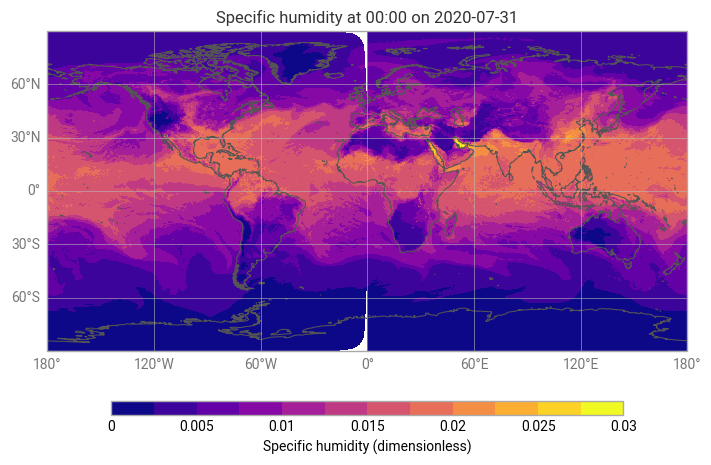

In [10]:
earthkit.plots.quickmap.plot(
    ds_pl["q"].sel(level=1000).sel(time="2020-07-31T00:00:00"),
    x="lon", y="lat",
);

The following example will load GRIB files for pressure level data stored as **spherical harmonic coefficients (sh)**. Since this data requires remapping to an **O400 grid** for visualization, the remapping step is included.


In [12]:
ds_pl_O400 = load_grib_files(leveltype="pl", gridtype="sh", remap=True)
ds_pl_O400

Loading dataset https://object-store.os-api.cci1.ecmwf.int/esiwacebucket/hplp/hplp_pl_sh_O400.grib


<xarray.Dataset>
Dimensions:  (time: 21, level: 21, value: 654400)
Coordinates:
    lat      (value) float64 ...
  * level    (level) int64 1 2 3 5 7 10 20 30 ... 300 400 500 700 850 925 1000
    lon      (value) float64 ...
  * time     (time) datetime64[ns] 2020-07-21 2020-07-21T12:00:00 ... 2020-07-31
Dimensions without coordinates: value
Data variables:
    d        (time, level, value) float64 ...
    r        (time, level, value) float64 ...
    t        (time, level, value) float64 ...
    u        (time, level, value) float64 ...
    v        (time, level, value) float64 ...
    vo       (time, level, value) float64 ...
    w        (time, level, value) float64 ...
    z        (time, level, value) float64 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    history:                 🪄🧙‍♂️🔮 magic dataset assembly provided by gribsc...

The data can be visualized as demonstrated below. For example, the temperature at **level 1** on **2020-07-31 at 00:00:00 UTC** is plotted.


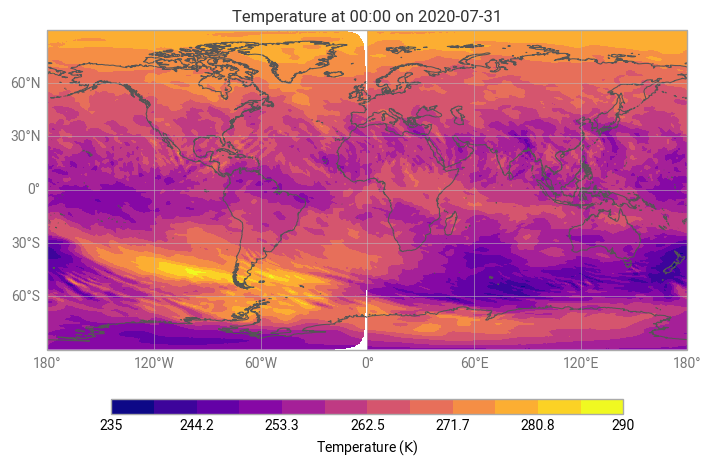

In [18]:
earthkit.plots.quickmap.plot(
    ds_pl_O400["t"].sel(level=1).sel(time="2020-07-31T00:00:00"),
    x="lon", y="lat",
);

The model level data stored on a **reduced_gg** grid is split into two files. Specifying a timestep of `240` ensures that the second part of the data is loaded, covering the time range from **2020-07-26 12:00:00 UTC** to **2020-07-31 00:00:00 UTC**.

In [20]:
ds_ml = load_grib_files(leveltype="ml", gridtype="reduced_gg", step=240)
ds_ml

Loading dataset https://object-store.os-api.cci1.ecmwf.int/esiwacebucket/hplp/hplp_ml_reduced_gg_levels_132_240.grib


<xarray.Dataset>
Dimensions:  (time: 10, level: 137, value: 654400)
Coordinates:
    lat      (value) float64 ...
  * level    (level) int64 1 2 3 4 5 6 7 8 9 ... 130 131 132 133 134 135 136 137
    lon      (value) float64 ...
  * time     (time) datetime64[ns] 2020-07-26T12:00:00 2020-07-27 ... 2020-07-31
Dimensions without coordinates: value
Data variables:
    cc       (time, level, value) float64 ...
    ciwc     (time, level, value) float64 ...
    clwc     (time, level, value) float64 ...
    crwc     (time, level, value) float64 ...
    cswc     (time, level, value) float64 ...
    o3       (time, level, value) float64 ...
    q        (time, level, value) float64 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    history:                 🪄🧙‍♂️🔮 magic dataset assembly provided by gribsc...

The data can be visualized as demonstrated below. For example, again, the specific humidity at **level 137** on **2020-07-31 at 00:00:00 UTC** is plotted.

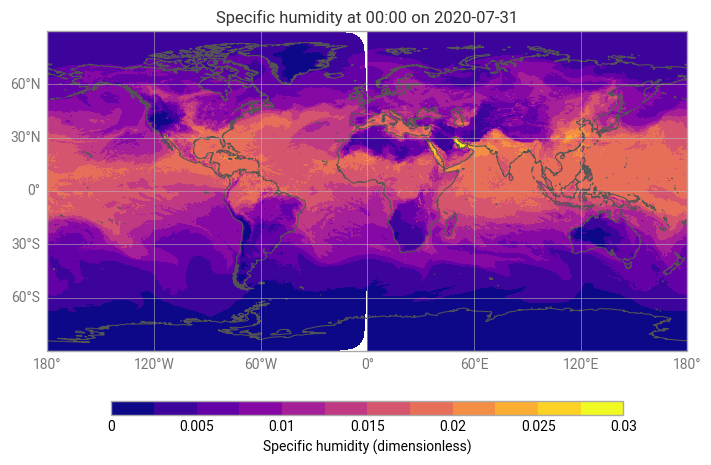

In [22]:
earthkit.plots.quickmap.plot(
    ds_ml["q"].sel(level=137).sel(time="2020-07-31T00:00:00"),
    x="lon", y="lat",
);

The surface level data is stored on a **reduced_gg** grid and can be loaded as in the following example.

In [15]:
ds_sfc = load_grib_files(leveltype="sfc", gridtype="reduced_gg")
ds_sfc

Loading dataset https://object-store.os-api.cci1.ecmwf.int/esiwacebucket/hplp/hplp_sfc.grib


<xarray.Dataset>
Dimensions:  (time: 21, value: 654400)
Coordinates:
    lat      (value) float64 ...
    lon      (value) float64 ...
  * time     (time) datetime64[ns] 2020-07-21 2020-07-21T12:00:00 ... 2020-07-31
Dimensions without coordinates: value
Data variables: (12/101)
    10fg     (time, value) float64 ...
    10u      (time, value) float64 ...
    10v      (time, value) float64 ...
    2d       (time, value) float64 ...
    2t       (time, value) float64 ...
    asn      (time, value) float64 ...
    ...       ...
    ttr      (time, value) float64 ...
    ttrc     (time, value) float64 ...
    uvb      (time, value) float64 ...
    vimd     (time, value) float64 ...
    vis      (time, value) float64 ...
    z        (time, value) float64 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    history:                 🪄🧙‍♂️🔮 magic dataset assembly provided by gribsc...

The data can be visualized as demonstrated below. For example, the 2 metre temperature in degrees Celsius on **2020-07-31 at 00:00:00 UTC** is plotted.

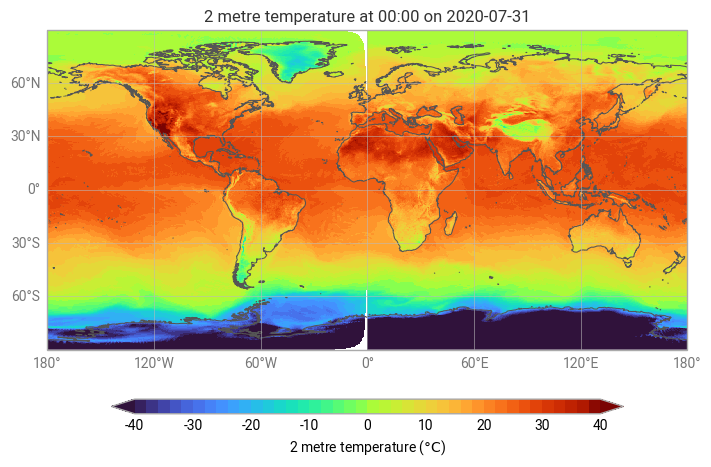

In [17]:
earthkit.plots.quickmap.plot(
    ds_sfc["2t"].sel(time="2020-07-31T00:00:00"),
    units="degC", x="lon", y="lat",
);

The wave model data is stored on a **reduced_ll** grid and can be loaded as in the following example.


In [13]:
ds_wave = load_grib_files(leveltype="wave", gridtype="reduced_ll")
ds_wave

Loading dataset https://object-store.os-api.cci1.ecmwf.int/esiwacebucket/hplp/hplp_wave.grib


<xarray.Dataset> Size: 958MB
Dimensions:  (time: 21, value: 315258)
Coordinates:
    lat      (value) float64 3MB ...
    lon      (value) float64 3MB ...
  * time     (time) datetime64[ns] 168B 2020-07-21 ... 2020-07-31
Dimensions without coordinates: value
Data variables: (12/18)
    cdww     (time, value) float64 53MB ...
    dwi      (time, value) float64 53MB ...
    hmax     (time, value) float64 53MB ...
    mp1      (time, value) float64 53MB ...
    mp2      (time, value) float64 53MB ...
    mwd      (time, value) float64 53MB ...
    ...       ...
    ust      (time, value) float64 53MB ...
    vst      (time, value) float64 53MB ...
    wdw      (time, value) float64 53MB ...
    wind     (time, value) float64 53MB ...
    wmb      (time, value) float64 53MB ...
    wstar    (time, value) float64 53MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    history:                 🪄🧙‍♂️🔮 magic dataset assembly provided by gribsc...

The data can be visualized as demonstrated below. For example, the 10 metre wind speed on **2020-07-31 at 00:00:00 UTC** is plotted.

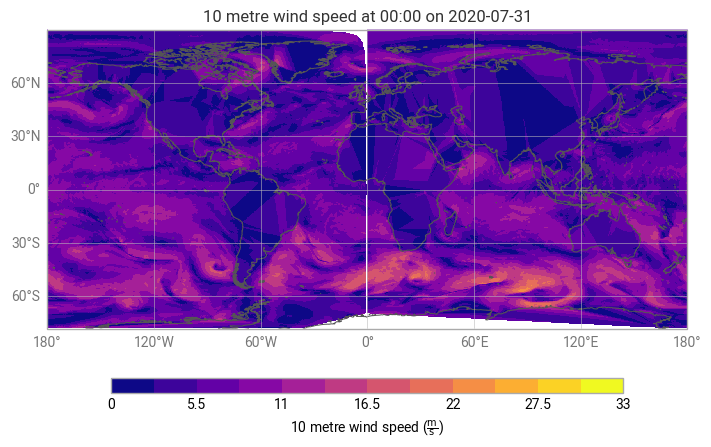

In [14]:
earthkit.plots.quickmap.plot(
    ds_wave["wind"].sel(time="2020-07-31T00:00:00"),
    x="lon", y="lat",
);